# 5.5 Modeling scenarios with uncertainty

In this tutorial, you will learn how to put everything together: calibrate a model, design interventions, and assess their impact.

## Problem 1

Consider we have data on two disease outbreaks. In the first outbreak ('baseline'), no intervention was applied. In the second outbreak, a vaccine was applied on the 10th day. Plot the following data to show the outbreaks.

In [1]:
import sciris as sc
import numpy as np
import pylab as pl
import starsim as ss

data_baseline = np.array([
 1,  2,  4,  7, 12, 18, 32, 45, 68, 80, 89, 93, 91, 89, 85, 82,
74, 61, 50, 45, 37, 38, 40, 48, 54, 57, 53, 53, 54, 52, 49, 48,
42, 33, 27, 24, 22, 20, 14, 11,  9, 10, 10,  7,  9,  9,  7,  7,
 9,  9,  9,  8, 11, 13, 13, 15, 20, 24, 28, 33, 42, 46, 53, 56,
56, 52, 55, 58, 53, 49, 41, 35, 33, 27, 26, 22, 14, 12, 14, 14,
14, 13, 12, 10, 12, 15, 17, 16, 17, 19, 22, 24, 29, 39, 40, 46,
53, 55, 58, 59, 59])

data_vaccine = np.array([
 1,  2,  4,  7, 12, 18, 26, 30, 37, 41, 46, 49, 46, 44, 39, 35,
34, 33, 28, 26, 20, 16, 16, 17, 14, 14, 14, 12, 12, 10,  7,  8,
 9,  7,  7,  8,  8,  7,  6,  7,  7,  8,  8,  7,  6,  7,  6,  5,
 4,  5,  4,  3,  2,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,
 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
 0,  0,  0,  0,  0])

# EXERCISE: plot data

Starsim 0.2.8 (2024-03-13) — © 2023-2024 by IDM


## Solution 1

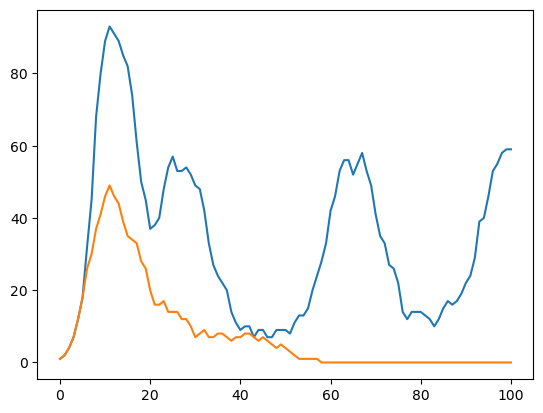

In [2]:
import sciris as sc
import numpy as np
import pylab as pl
import starsim as ss

data_baseline = np.array([
 1,  2,  4,  7, 12, 18, 32, 45, 68, 80, 89, 93, 91, 89, 85, 82,
74, 61, 50, 45, 37, 38, 40, 48, 54, 57, 53, 53, 54, 52, 49, 48,
42, 33, 27, 24, 22, 20, 14, 11,  9, 10, 10,  7,  9,  9,  7,  7,
 9,  9,  9,  8, 11, 13, 13, 15, 20, 24, 28, 33, 42, 46, 53, 56,
56, 52, 55, 58, 53, 49, 41, 35, 33, 27, 26, 22, 14, 12, 14, 14,
14, 13, 12, 10, 12, 15, 17, 16, 17, 19, 22, 24, 29, 39, 40, 46,
53, 55, 58, 59, 59])

data_vaccine = np.array([
 1,  2,  4,  7, 12, 18, 26, 30, 37, 41, 46, 49, 46, 44, 39, 35,
34, 33, 28, 26, 20, 16, 16, 17, 14, 14, 14, 12, 12, 10,  7,  8,
 9,  7,  7,  8,  8,  7,  6,  7,  7,  8,  8,  7,  6,  7,  6,  5,
 4,  5,  4,  3,  2,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,
 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
 0,  0,  0,  0,  0])

# EXERCISE: plot data
pl.figure()
pl.plot(data_baseline, label='Baseline')
pl.plot(data_vaccine, label='Vaccine')

## Problem 2

Next, we wish to calibrate the model. Change the parameters to `make_run_sim()` to find a good match to `data_baseline`.

In [5]:
import sciris as sc
import numpy as np
import pylab as pl
import starsim as ss

data_baseline = np.array([
 1,  2,  4,  7, 12, 18, 32, 45, 68, 80, 89, 93, 91, 89, 85, 82,
74, 61, 50, 45, 37, 38, 40, 48, 54, 57, 53, 53, 54, 52, 49, 48,
42, 33, 27, 24, 22, 20, 14, 11,  9, 10, 10,  7,  9,  9,  7,  7,
 9,  9,  9,  8, 11, 13, 13, 15, 20, 24, 28, 33, 42, 46, 53, 56,
56, 52, 55, 58, 53, 49, 41, 35, 33, 27, 26, 22, 14, 12, 14, 14,
14, 13, 12, 10, 12, 15, 17, 16, 17, 19, 22, 24, 29, 39, 40, 46,
53, 55, 58, 59, 59])

data_vaccine = np.array([
 1,  2,  4,  7, 12, 18, 26, 30, 37, 41, 46, 49, 46, 44, 39, 35,
34, 33, 28, 26, 20, 16, 16, 17, 14, 14, 14, 12, 12, 10,  7,  8,
 9,  7,  7,  8,  8,  7,  6,  7,  7,  8,  8,  7,  6,  7,  6,  5,
 4,  5,  4,  3,  2,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,
 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
 0,  0,  0,  0,  0])


class Vaccine(ss.Intervention):
    def __init__(self, ti=10, p=0.5, boost=2.0):
        super().__init__()
        self.ti = ti
        self.p = p
        self.boost = boost
    
    def apply(self, sim):
        if sim.ti == self.ti:
            sis = sim.diseases.sis
            eligible_ids = sim.people.uid[sis.susceptible]
            n_eligible = len(eligible_ids)
            is_vacc = np.random.rand(n_eligible) < self.p
            vacc_ids = eligible_ids[is_vacc]
            sis.immunity[vacc_ids] += self.boost


def make_run_sim(beta=0.05, waning=0.05, seed=1, vaccine=False, ti=10, p=0.5, boost=2.0):
    pars = dict(
        n_agents = 100,
        start = 0,
        end = 100,
        dt = 1.0,
        verbose = 0,
        rand_seed = seed,
        networks = 'random',
        diseases = dict(
            type = 'sis',
            beta = beta,
            waning = waning,
        )
    )
    
    # Define "baseline" and "intervention" sims without and with the vaccine
    if vaccine:
        vx = Vaccine(ti=ti, p=p, boost=boost)
        sim = ss.Sim(pars, interventions=vx)
    else:
        sim = ss.Sim(pars)
    
    # Run the simulation
    sim.run()
    results = sc.objdict()
    results.time = sim.yearvec
    results.n_infected = sim.results.sis.n_infected
    return results


def plot(results, label=''):
    pl.title('Number of people infected')
    pl.plot(results.time, results.n_infected, label=label)
    pl.legend()
    sc.figlayout()
    # pl.show()
    

# Make, run, and plot the simulation
pl.figure()
#pl.scatter(results.time, data_baseline, c='k', label='Baseline data')
for seed in range(5):
    pars = dict(beta=0.05, waning=0.05, seed=seed) # EXERCISE: update parameters
    results = make_run_sim(**pars)
    plot(results, 'Baseline')

ValueError: Could not convert {'type': 'sis', 'beta': 0.05, 'waning': 0.05, 'name': 'sis'} to an instance of class diseases.Try specifying it directly rather than as a dictionary.

<Figure size 640x480 with 0 Axes>

## Solution 2

In [4]:
# Make, run, and plot the simulation
pl.figure()
pl.scatter(results.time, data_baseline, c='k', label='Baseline data')
for seed in range(5):
    pars = dict(beta=0.08, waning=0.03, seed=seed) # EXERCISE: update parameters
    results = make_run_sim(**pars)
    plot(results, 'Baseline')

NameError: name 'results' is not defined

<Figure size 640x480 with 0 Axes>

## Problem 3

Estimate the vaccine properties -- the day it was given, the proportion of people who received it and the amount of immune boost. (Note: you will not be able to get a perfect fit!)

In [6]:
# Make, run, and plot the simulation
pl.figure()
pl.scatter(results.time, data_vaccine, c='k', label='Vaccine data')
for seed in range(5):
    pars = dict(beta=0.08, waning=0.03, seed=seed)
    vaccine_pars = dict(vaccine=True, ti=10, p=0.5, boost=2) # EXERCISE: update parameters
    results = make_run_sim(**pars, **vaccine_pars)
    plot(results, f'Vaccine seed={seed}')

NameError: name 'results' is not defined

<Figure size 640x480 with 0 Axes>

## Solution 3

In [ ]:
# Make, run, and plot the simulation
pl.figure()
pl.scatter(results.time, data_vaccine, c='k', label='Vaccine data')
for seed in range(5):
    pars = dict(beta=0.08, waning=0.03, seed=seed)
    vaccine_pars = dict(vaccine=True, ti=5, p=0.7, boost=10) # EXERCISE: update parameters (note, not actually the parameters used to make the data!)
    results = make_run_sim(**pars, **vaccine_pars)
    plot(results, f'Vaccine seed={seed}')